Task:

Lakukan hasil analisis data semenarik mungkin

In [3]:
import sys
print("Python version:", sys.version)

Python version: 3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]


In [78]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("bmh")
import seaborn as sns


import os
import datetime

from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo


import warnings
warnings.filterwarnings('ignore')


from IPython.display import clear_output

In [40]:
#get dataset
df=pd.read_excel("data UAS_APG_2023.xlsx").iloc[:,1:]

#gk ada metadata :(

In [14]:
#verify dataset and cleaning if needed
df.isna().sum()     #Chck for missing val
df.dtypes           #check for col type
df.describe()   #summary of the dataframe
df.head()

,Kab/Kota,SI,SP,SKL,SPT,SSP,SPL,SB,SPN,Akreditasi
0,Kabupaten Bantul,100.00,100.0,79.0,92.50,82.50,100.00,100.0,100.00,A
1,Kabupaten Bantul,76.67,85.0,73.0,66.25,64.17,81.25,72.0,78.75,B
2,Kabupaten Sleman,96.67,92.5,94.0,80.00,93.33,98.75,95.0,86.25,A
3,Kabupaten Sleman,93.33,82.5,81.0,92.50,91.67,91.25,96.0,90.00,A
4,Kabupaten Sleman,78.33,82.5,91.0,96.25,88.33,88.75,95.0,82.50,A


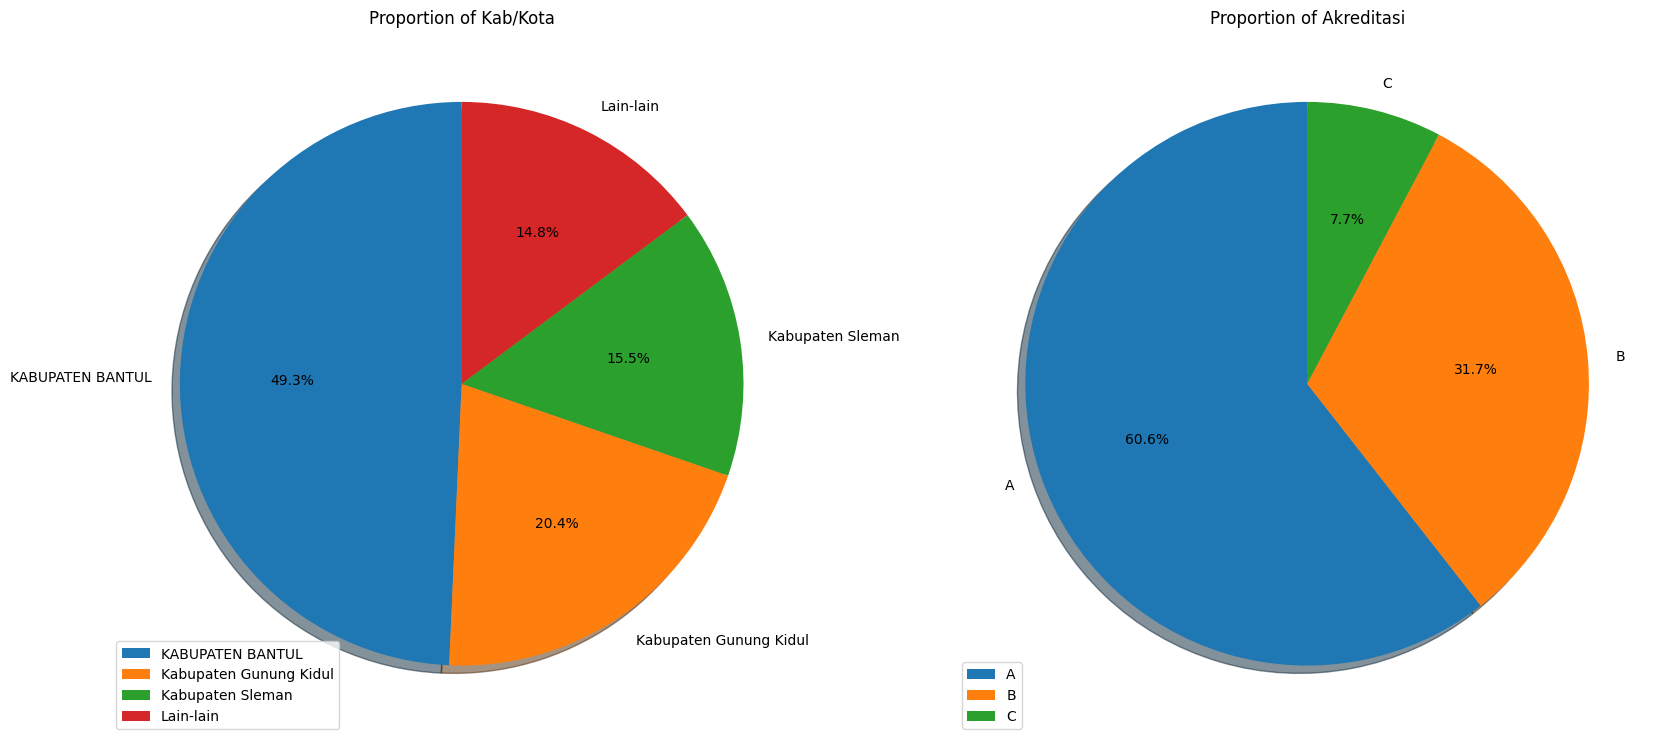

In [56]:
#get proportion of each features
asu=df["Kab/Kota"]
asu.unique()
for i in df["Kab/Kota"].unique():
    if len(asu[asu==i])/len(asu)<0.14:
        asu[asu==i]="Lain-lain"
    else:
        pass
asu=pd.concat((asu, df["Akreditasi"]), axis=1)

fig=plt.figure(figsize=(20,20))
fig.set

counter=0
for i in asu:
    counter+=1
    ax=fig.add_subplot(1,2,counter)
    ax.pie(df[i].value_counts().values,  labels= np.unique(df[i].values), autopct='%1.1f%%', shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)
    ax.set_title(f'Proportion of {i}')
    ax.legend(loc="lower left")

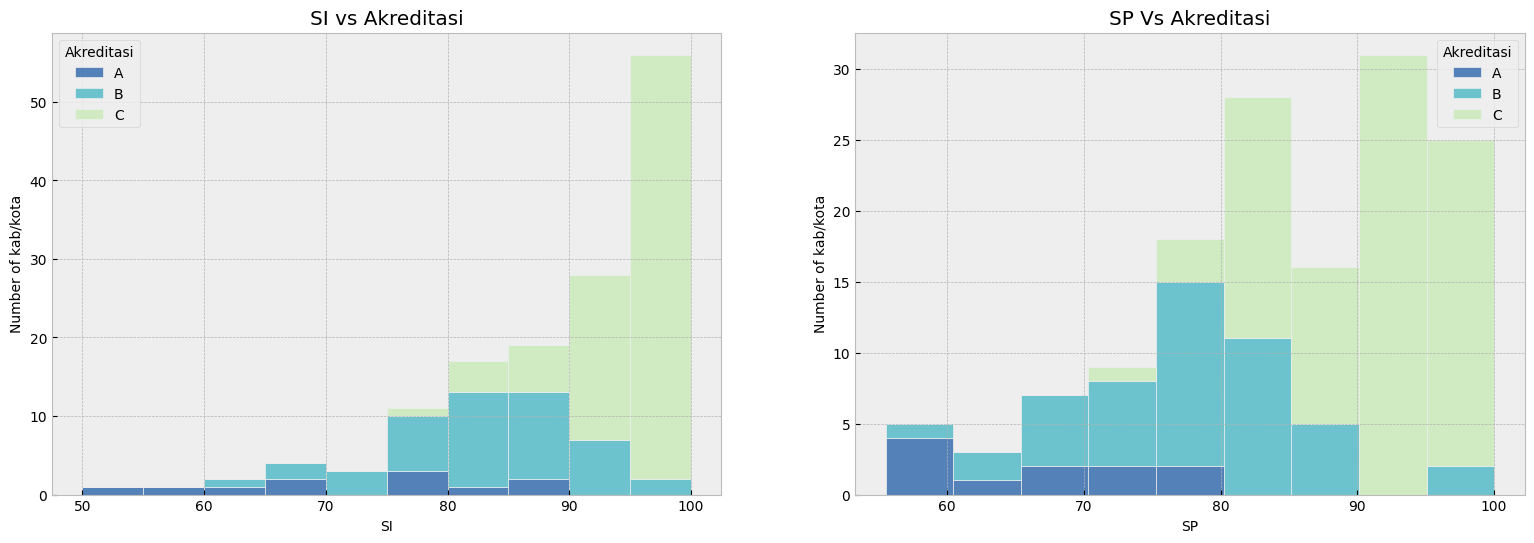

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 6))

sns.histplot(data=df, x="SI", hue="Akreditasi", multiple="stack", ax=ax1, palette= 'YlGnBu')
ax1.set_title('SI vs Akreditasi')
ax1.set_xlabel('SI')
ax1.set_ylabel('Number of kab/kota')
legend1 = ax1.legend(title="Akreditasi", labels=["A", "B", "C"])

sns.histplot(data=df, x="SP", hue="Akreditasi", multiple="stack", ax=ax2, palette= 'YlGnBu')
ax2.set_title('SP Vs Akreditasi')
ax2.set_xlabel('SP')
ax2.set_ylabel('Number of kab/kota')
legend2 = ax2.legend(title="Akreditasi", labels=["A", "B", "C"])


In [85]:
#Change all categorical columns into ordinal
objectcolnames=[]
for i in df.columns:
    if df[i].dtype=="object": objectcolnames.append(i)
encoder=ce.OrdinalEncoder(cols=objectcolnames)
encoder.fit(df)
df_encoded=encoder.transform(df)

Faktor analisis

0.9432921697522855


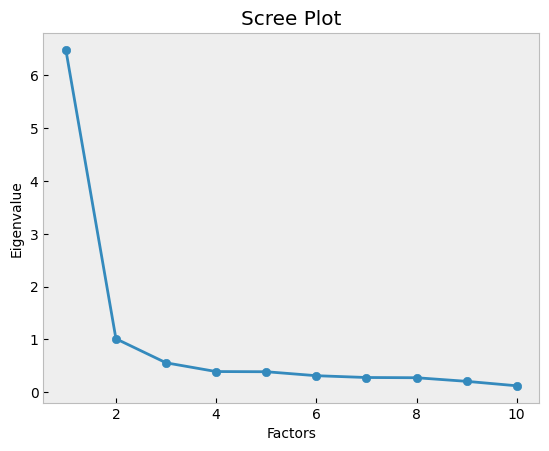

[(1, 6.486432318333812), (2, 1.0095830400478907), (3, 0.5540742725584514), (4, 0.38809510833681654), (5, 0.3847353263215663), (6, 0.3095286270737474), (7, 0.2753561580354792), (8, 0.270990563422259), (9, 0.20274027408872702), (10, 0.1184643117812476)]


In [99]:
kmo_all,kmo_model=calculate_kmo(df_encoded)
print(kmo_model)
fa = FactorAnalyzer()
fa.fit(df_encoded)
ev, v= fa.get_eigenvalues()
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
(list(enumerate(ev, 1)))

In [185]:
pd.DataFrame(list(enumerate(ev, 1)), columns=["Faktor", "Eigenvalue"])

,Faktor,Eigenvalue
0,1,6.486432
1,2,1.009583
2,3,0.554074
3,4,0.388095
4,5,0.384735
5,6,0.309529
6,7,0.275356
7,8,0.270991
8,9,0.202740
9,10,0.118464


In [102]:
fa = FactorAnalyzer()
fa.set_params(n_factors=3, rotation="varimax")
fa.fit(df_encoded)
loadings = fa.loadings_
pd.DataFrame(loadings, columns=["Factor 1", "Factor 2", "Factor 3"])

,Factor 1,Factor 2,Factor 3
0,0.040482,0.037941,0.411186
1,0.780368,0.319296,0.205048
2,0.744655,0.430458,-0.018150
3,0.587618,0.535112,0.241561
4,0.480857,0.656130,0.044804
5,0.370734,0.860094,0.077977
6,0.579697,0.595798,0.138399
7,0.517332,0.567268,0.350338
8,0.650773,0.413951,0.067838
9,-0.641936,-0.661027,-0.188849


#PCA REDUCTION and plotting!

Text(0.5, 1.0, 'Dataframe reduced to 2 dimensions by PCA')

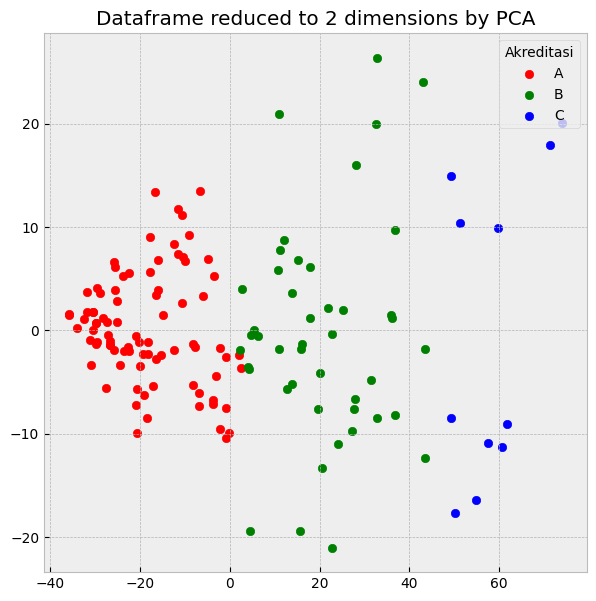

In [122]:
colour=["red", "green", "Blue"]
X_encoded=df_encoded.copy()
y_encoded=X_encoded.pop("Akreditasi")
targetnames=["A", "B", 'C']

PCA_X=PCA(n_components=2).fit_transform(X_encoded)

fig, ax = plt.subplots(1,1, figsize=(7,7))
for i in range(1,4):
    ax.scatter(PCA_X[y_encoded==i,0], PCA_X[y_encoded==i,1], c=colour[i-1], label=targetnames[i-1])
ax.legend(title= "Akreditasi", loc="upper right")
ax.set_title("Dataframe reduced to 2 dimensions by PCA")

In [123]:
#Neural Network Classifier
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from keras import layers
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [124]:
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
batch_size=32


In [165]:
df=pd.read_excel("data UAS_APG_2023.xlsx").iloc[:,1:]
X=df.copy()
y=X.pop("Akreditasi")
encoder=ce.OneHotEncoder(cols=["Kab/Kota"])
encoder.fit(X)
X=encoder.transform(X)
X = np.asarray(X).astype(np.float32)
for i, j in zip(y.unique(), [0,1,2]):
    y[y==i]=j
y = np.asarray(y).astype(np.float32)

train_data, test_data, train_value, test_value = train_test_split(X, y, train_size= 0.8)

train_value = keras.utils.to_categorical(train_value, 3)
test_value = keras.utils.to_categorical(test_value, 3)

In [182]:
#callbacks
def tensorboardlogger():
    return [keras.callbacks.ModelCheckpoint(log_dir+"/callbacks", save_weights_only=True),
            tf.keras.callbacks.TensorBoard(log_dir)]
    
def theplot(history):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(2,1,1)
    ax.plot(history.history["accuracy"], label="accuracy", c="blue")
    ax.plot(history.history["val_accuracy"], label="- val_accuracy", c="orange")
    ax.set_xlabel("epochs")
    ax.set_ylabel("accuracy")
    ax.legend(loc="lower right")
    
    ax=fig.add_subplot(2,1,2)
    ax.plot(history.history["loss"], label="loss", c="blue")
    ax.plot(history.history["val_loss"], label="val_loss", c="orange")
    ax.legend(loc="lower right")
    ax.set_ylim(0,3)
    ax.set_xlabel("epochs")
    ax.set_ylabel("losses")

In [170]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(4, activation='relu', input_dim=X.shape[1]),
      layers.Dense(16, activation='relu'),
      layers.Dense(len(np.unique(y)), activation="softmax"),
  ])

  model.compile(loss="categorical_crossentropy",
                optimizer="adam", metrics=["accuracy"])
  return model

In [173]:
epoch=1000
test1=build_and_compile_model()
history=test1.fit(train_data, train_value, epochs=epoch, batch_size=batch_size,
          validation_data=(test_data, test_value),
          verbose=1)

Epoch 1/1000
4/4 [==============================] - 2s 99ms/step - loss: 17.4365 - accuracy: 0.4071 - val_loss: 4.3468 - val_accuracy: 0.6897
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 3.5477 - accuracy: 0.4867 - val_loss: 5.5332 - val_accuracy: 0.2069
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 3.0600 - accuracy: 0.3717 - val_loss: 2.5933 - val_accuracy: 0.6897
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.7951 - accuracy: 0.5929 - val_loss: 1.3418 - val_accuracy: 0.6552
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.5198 - accuracy: 0.4602 - val_loss: 1.0560 - val_accuracy: 0.5862
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.9916 - accuracy: 0.6372 - val_loss: 1.0187 - val_accuracy: 0.6552
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8765 - accuracy: 0.6549 - val_loss: 1.3367 - val_accuracy: 0.5517
Epoch 8/1000

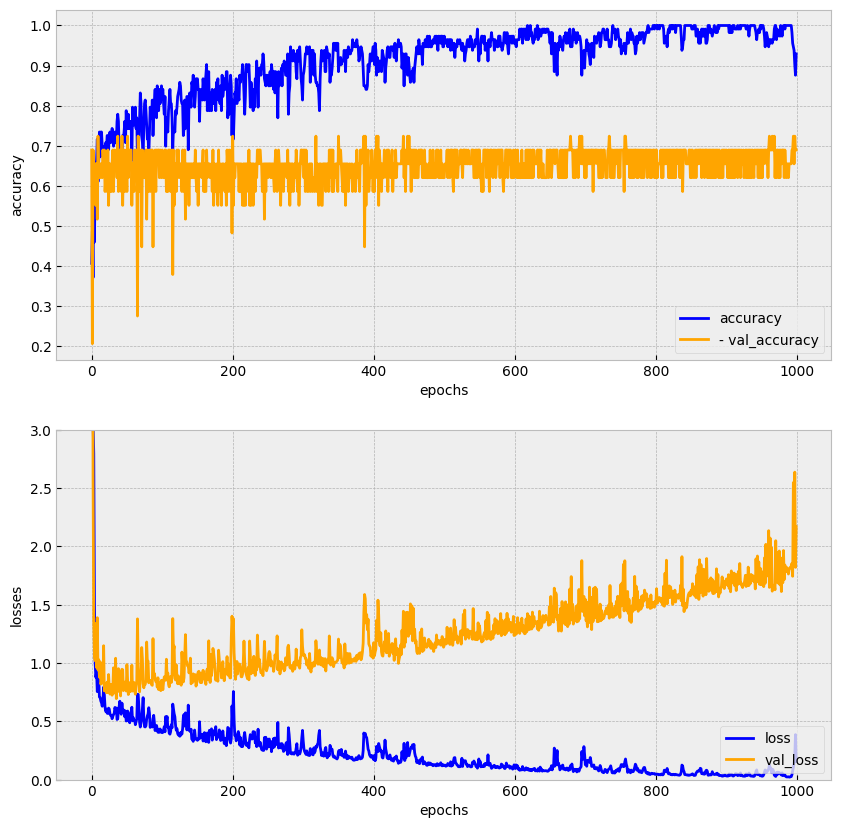

In [183]:
theplot(history)